# p-Median

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Median" data-toc-modified-id="p-Median-1.1">p Median</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### p Median

The p-median is a location assignment model that locates a given number of facilities $p$ and assigns demand node $i$ to facility $j$ in order to **minimize the total distance from the demand points to the facility**. In other words, we want to choose $p$ facilities from potential facility locations as median to minimize the total distance between the demand nodes and the location where the facility is placed, and each demand point should be assigned to their nearest medians. 


*Parameters*:
* **$I$** : Collection of demand point locations
* **$h_i$** : Number of customers at point $i$
* **$P$** : Total number of facilities
* **$d_{ij}$** : Distance between point $i$ and point $j$

*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i, j \in I} h_i d_{i j} Y_{i j} & (1)\\
\text { s.t. } & \sum_{i \in I} X_i=P, & (2)\\
& Y_{i j} \leq X_j,  \forall i, j \in I, & (3) \\
& \sum_{j \in I} Y_{i j}=1,  \forall i \in I, & (4)\\
& X_i, Y_{i j} \in\{0,1\}, \forall i, j \in I.  & (5)
\end{array}

        

## Setup

In [1]:
import random
from itertools import product
import numpy as np
import pandas as pd
import osmnx as ox

from location.PModel import *

In [2]:
np.random.seed(0) # random seed
random.seed(0)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

### Random Data

In [3]:
num_points = 20
num_located = 4  # P: number of located facility in the end
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)  # h
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(random.random(), random.random()) for i in range(num_points)]
y, selected, selected_points, unselected_points  = PMedian(num_points=num_points,
                                                 num_located=num_located,
                                                 cartesian_prod=cartesian_prod,
                                                 num_people=num_people,
                                                 cover=points,
                                                 solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [7, 10, 11, 14]
Assigned relationships =  [(0, 11), (1, 7), (2, 7), (3, 7), (4, 10), (5, 11), (6, 10), (7, 7), (8, 14), (9, 14), (10, 10), (11, 11), (12, 7), (13, 10), (14, 14), (15, 10), (16, 10), (17, 7), (18, 7), (19, 11)]
Minimum total distance =  2.4169192030246136


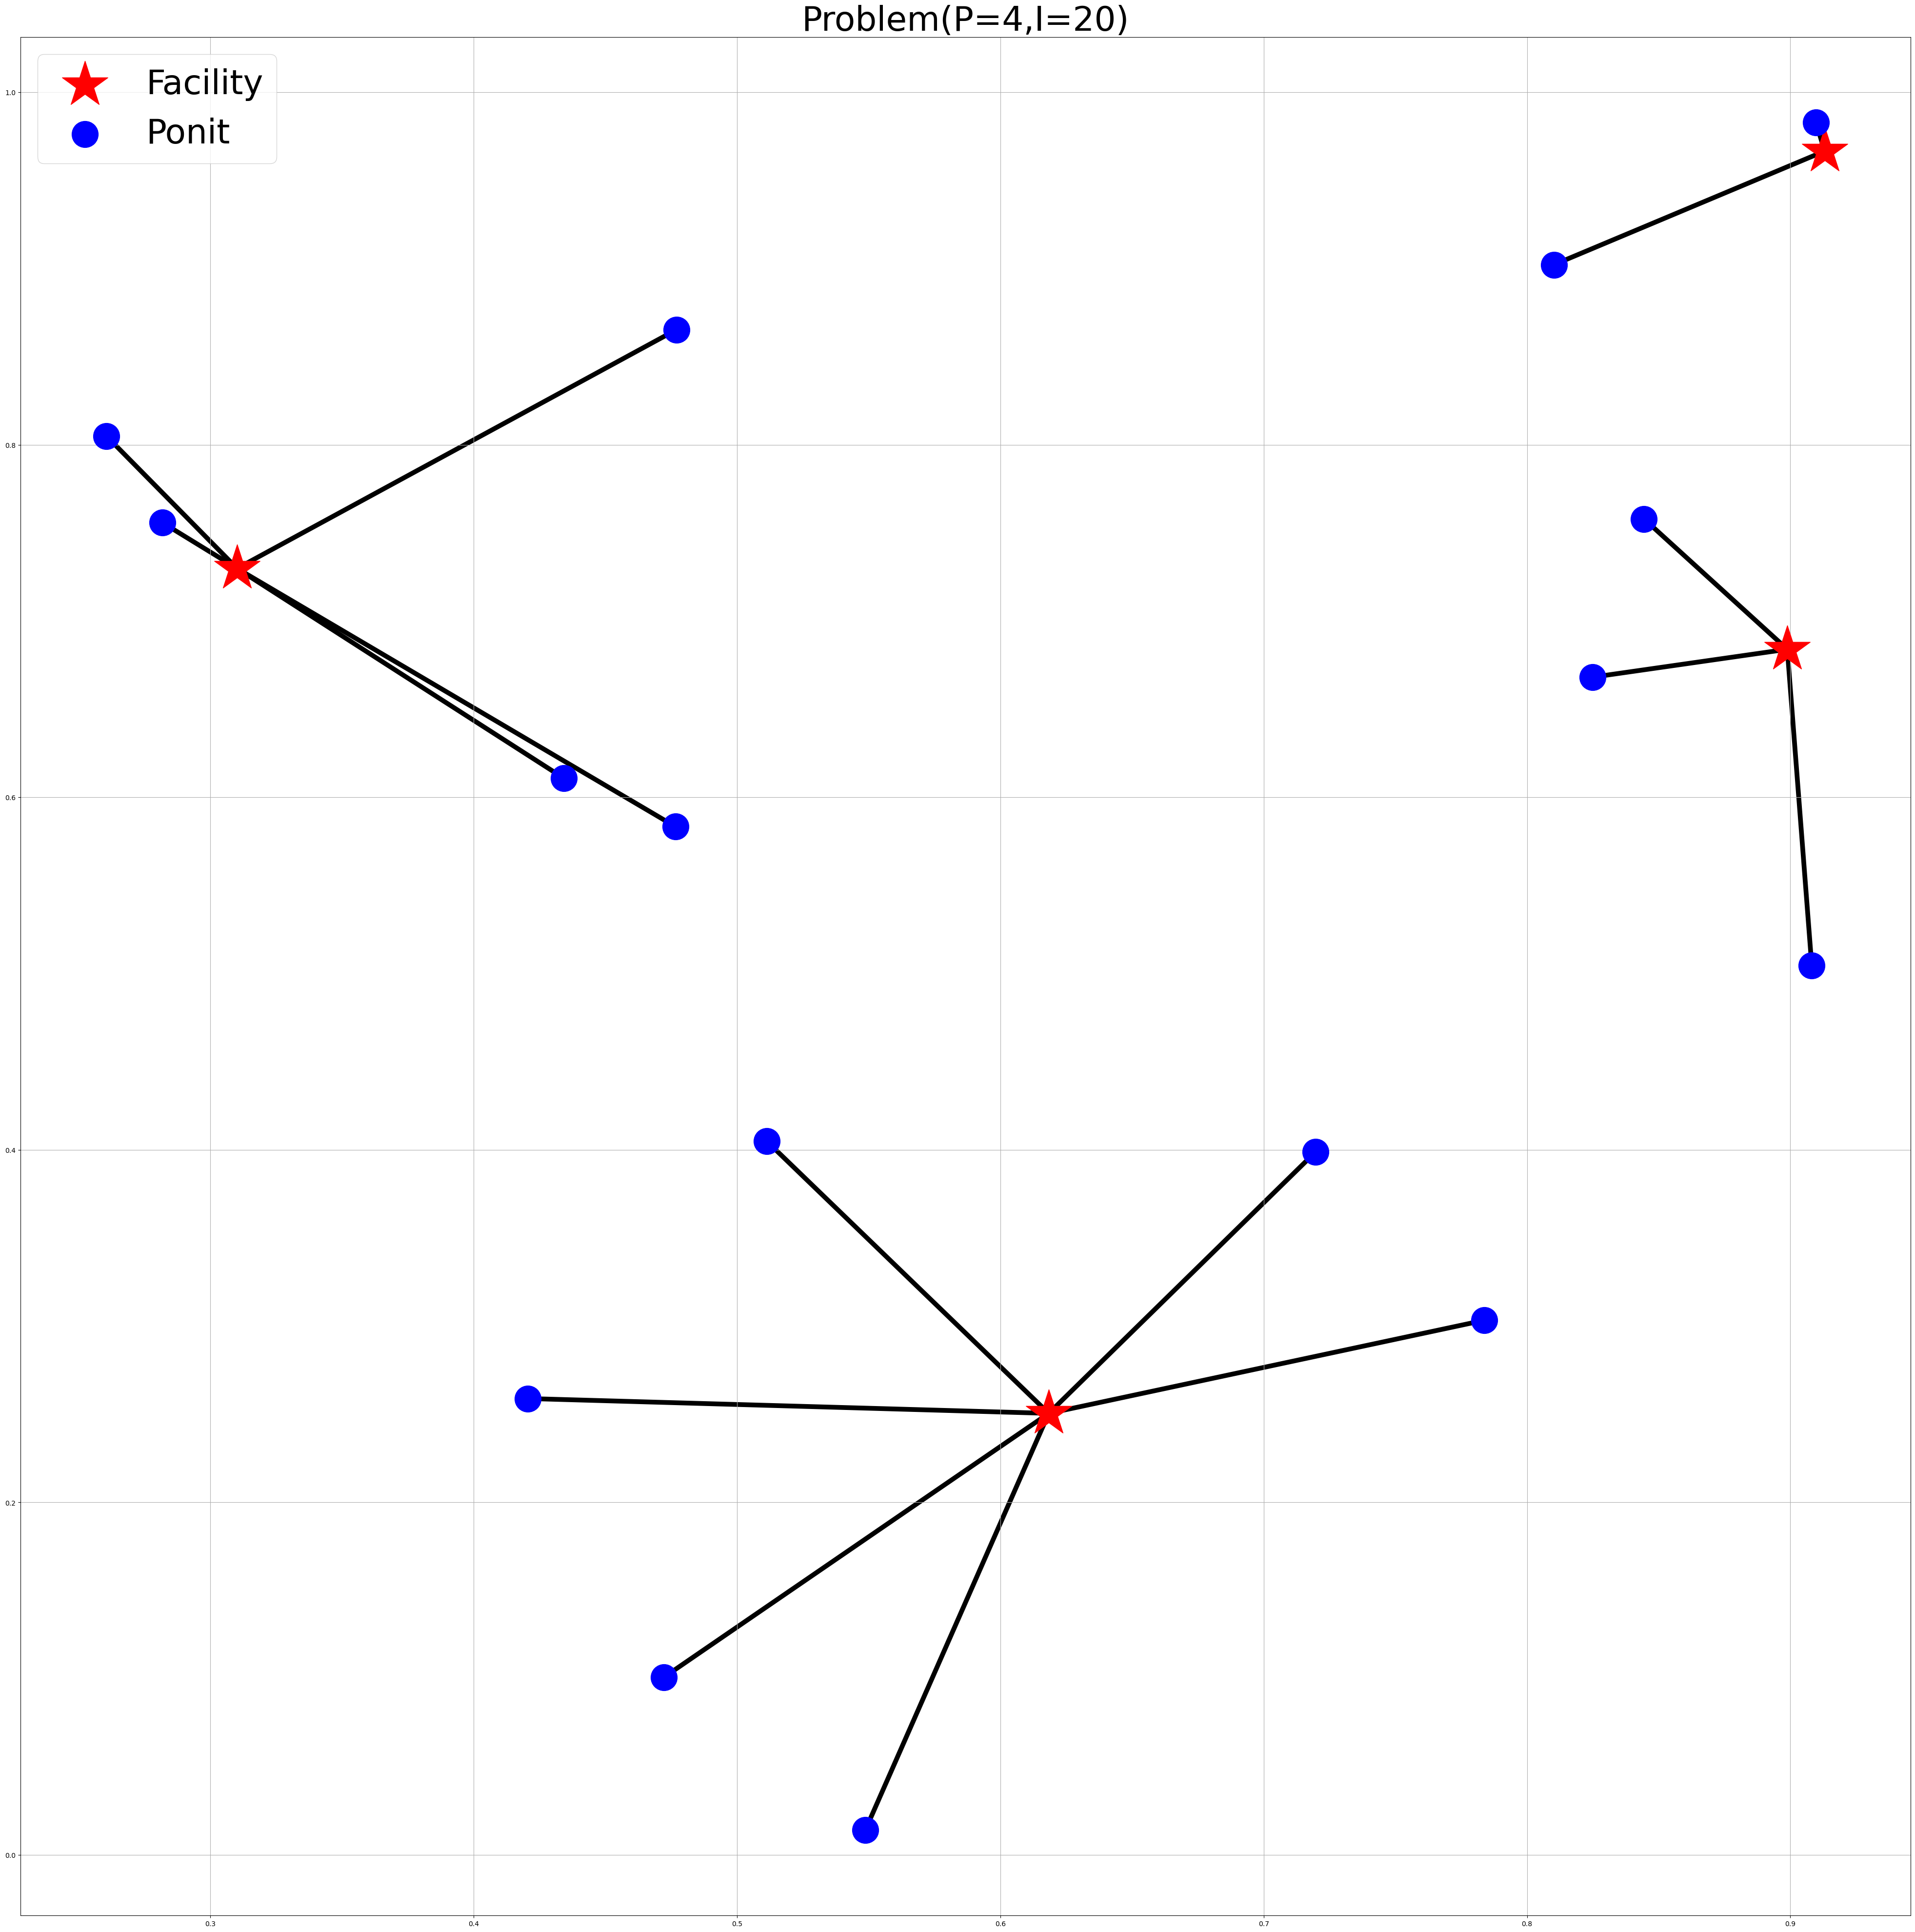

In [4]:
#Image representation
plt.figure(figsize=(50,50))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, fontsize = 50)
#Points
plt.scatter(*zip(*selected_points), c='Red', marker='*',s=5000,label = 'Facility',zorder=2)   
plt.scatter(*zip(*unselected_points), c='Blue', marker='o',s=1500, label = 'Ponit', zorder=3)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='Black', linewidth=7, zorder=1)

plt.grid(True)   
plt.legend(loc='best', fontsize = 50) 
plt.show()

### Road Network Data

In [5]:
df = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [6]:
y, selected, selected_points, unselected_points  = PMedian(num_points=num_points,
                                                 num_located=num_located,
                                                 cartesian_prod=cartesian_prod,
                                                 num_people=num_people,
                                                 cover=points,
                                                 solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [1, 7, 27, 28, 29, 42, 45, 84, 105, 108]
Assigned relationships =  [(0, 105), (1, 1), (2, 108), (3, 84), (4, 28), (5, 28), (6, 28), (7, 7), (8, 28), (9, 84), (10, 108), (11, 108), (12, 45), (13, 29), (14, 45), (15, 1), (16, 1), (17, 1), (18, 45), (19, 45), (20, 28), (21, 84), (22, 108), (23, 45), (24, 28), (25, 45), (26, 28), (27, 27), (28, 28), (29, 29), (30, 105), (31, 27), (32, 108), (33, 28), (34, 28), (35, 29), (36, 1), (37, 42), (38, 84), (39, 7), (40, 42), (41, 29), (42, 42), (43, 28), (44, 45), (45, 45), (46, 108), (47, 29), (48, 45), (49, 1), (50, 45), (51, 29), (52, 45), (53, 105), (54, 42), (55, 7), (56, 45), (57, 108), (58, 84), (59, 7), (60, 105), (61, 29), (62, 84), (63, 45), (64, 29), (65, 29), (66, 29), (67, 45), (68, 45), (69, 42), (70, 42), (71, 7), (72, 105), (73, 29), (74, 29), (75, 1), (76, 84), (77, 28), (78, 28), (79, 28), (80, 108), (81, 105), (82, 28), (83, 108), (84, 84), (85, 29), (86, 29), (87, 42), (88, 45), (89, 27), (9

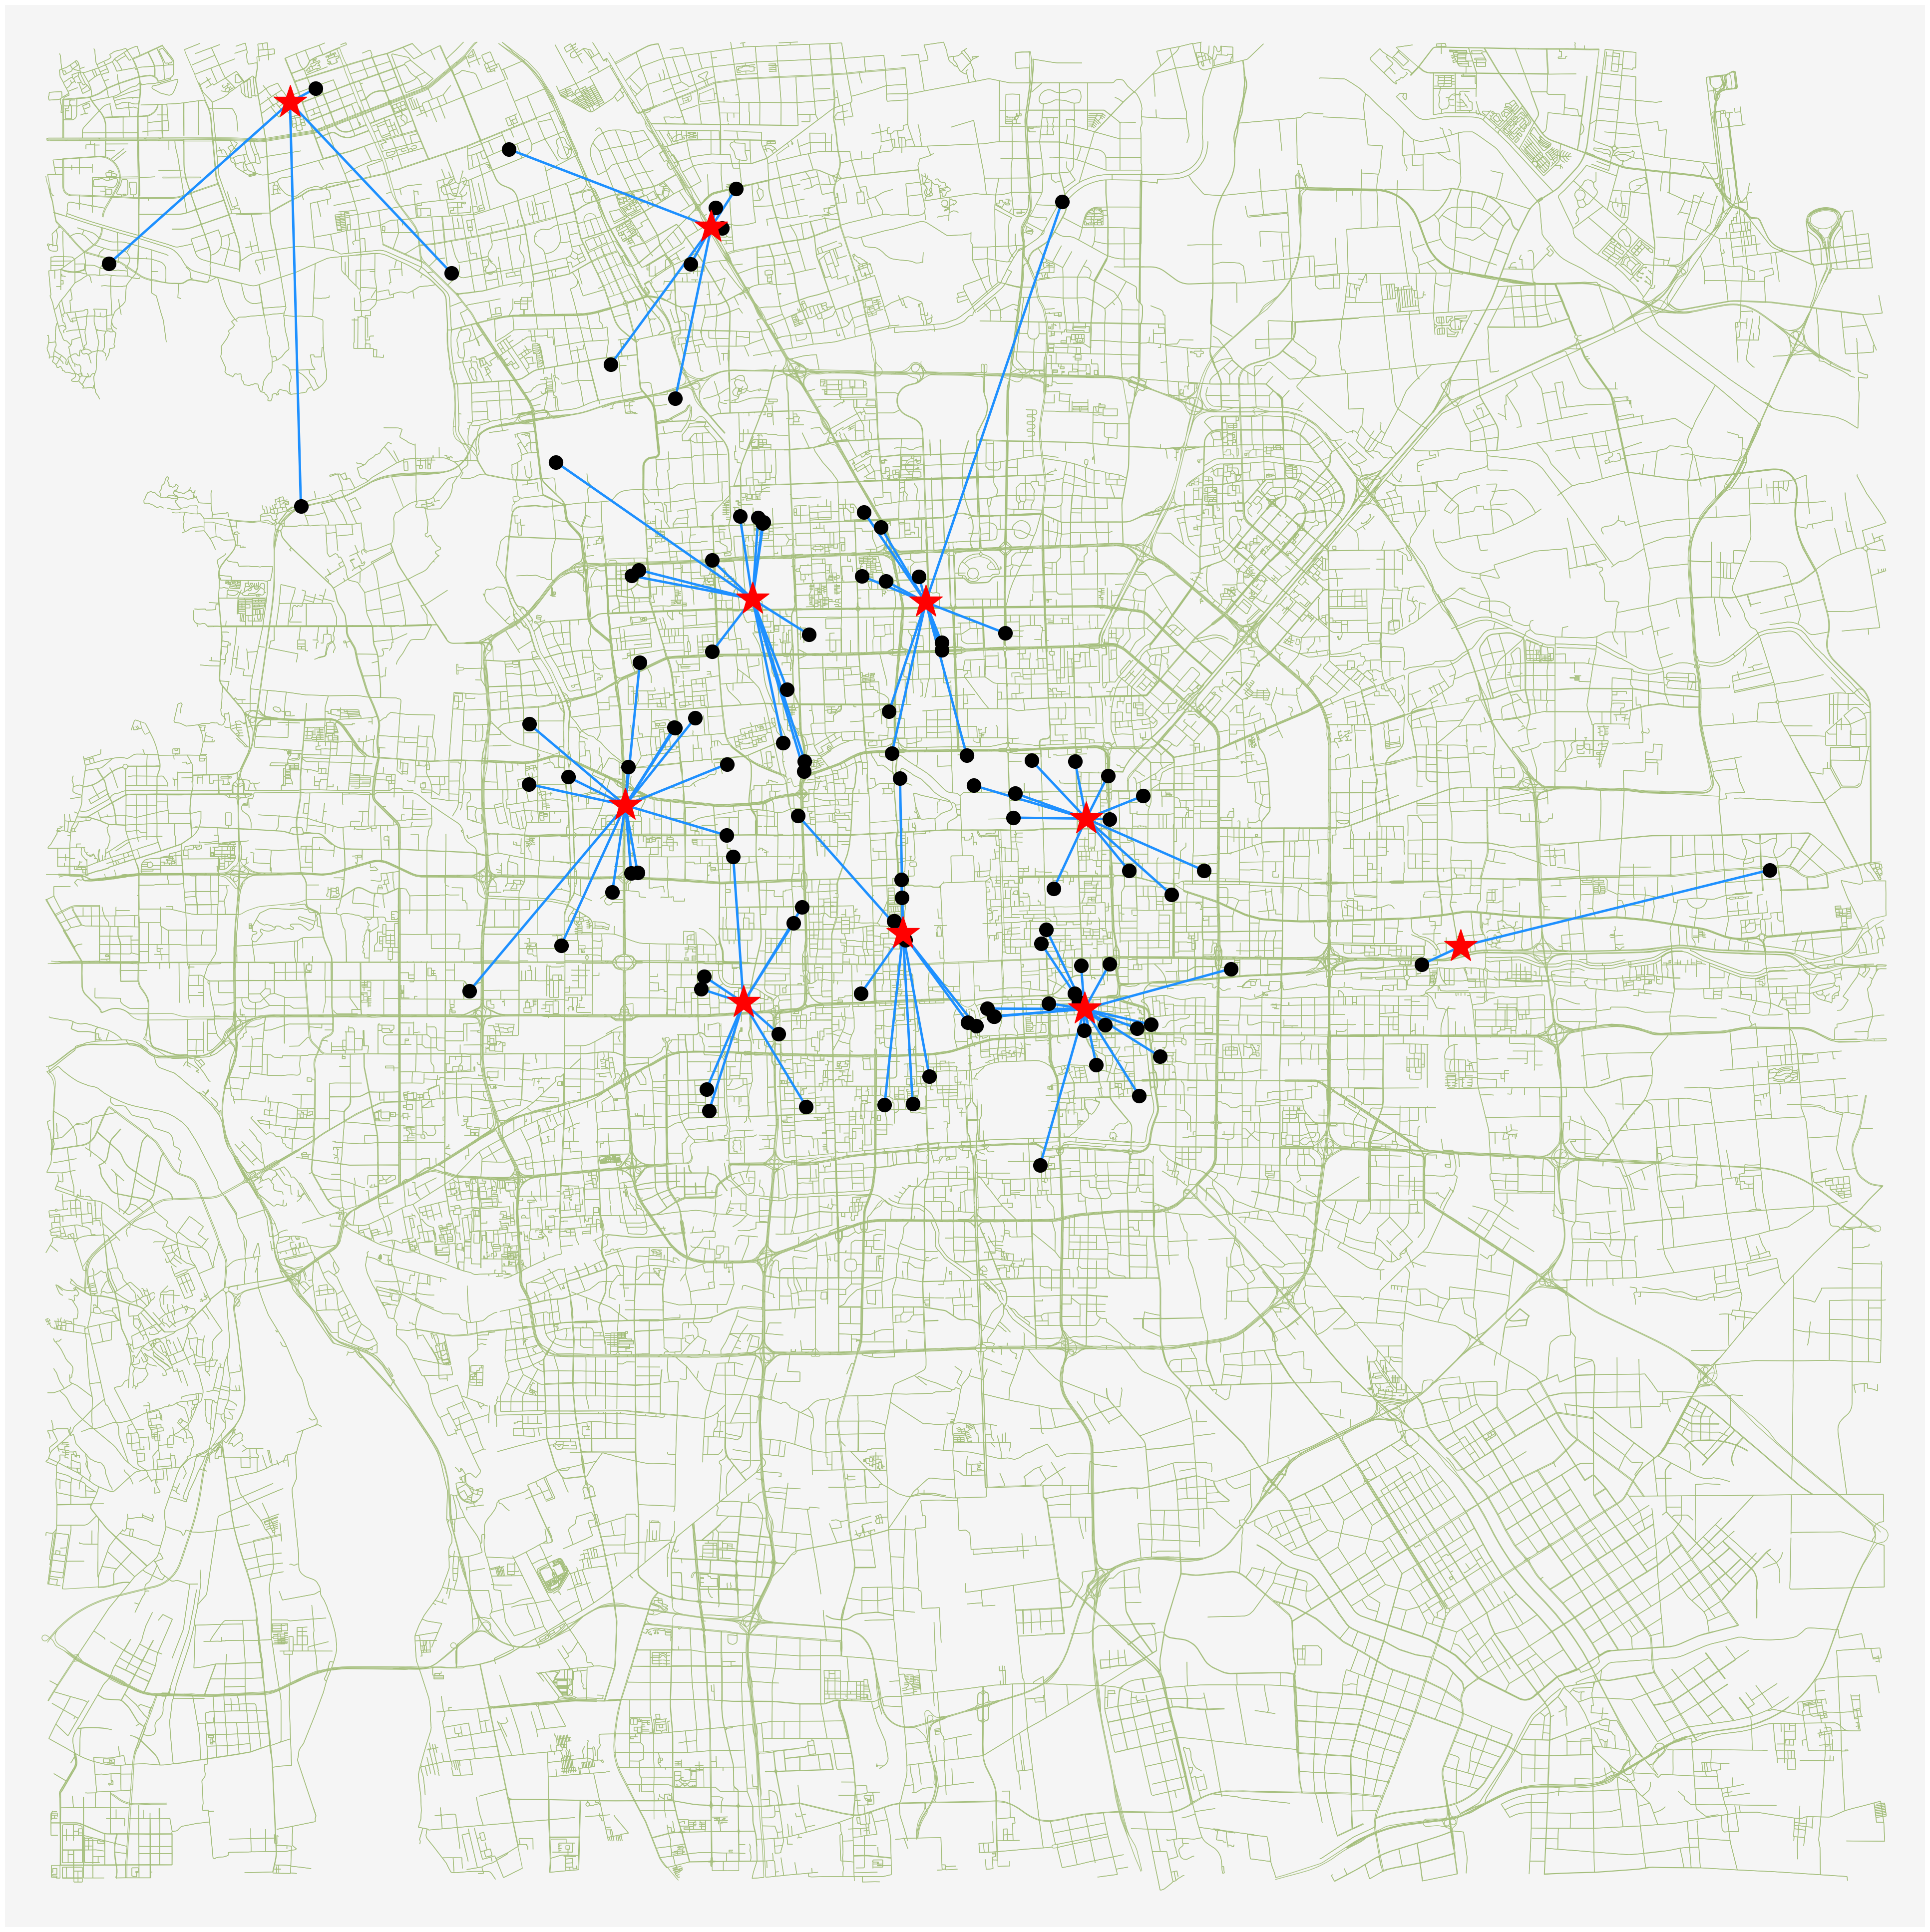

In [7]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='#1E90FF', linewidth=3.5, zorder=1)